# Solutions to Modern Data Science Problems (probelms till 15.01)
*by Mateusz Kmieć* 

In [107]:
%matplotlib inline
#standard imports 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### Problem 35
We consider two models for classification: (1) “flexible” (e.g. kNN) (2) “rigid ” (e.g. linear). Discuss which would you typically choose in those situations:
* A small number of training samples N

*Rigid* Flexible is unstable for a small number of data.

* A large number of features

*Rigid* Course of dimensionality

* A large number of training samples N

*Flexible* Having a larger set of data it is often beneficial to use a non-parametric method since it requires less assumptions about data.

* Highly non-linear behavior


*Flexible* Rigid method would involve a very complex model with many parameters.

### Problem 36.

Add feature scaling (standardization and normalization) for your k-NN implementation.
Check if it affects the results.

pretty standard problem surely there is a solution out there!

### Problem 37
We want to check if the coin is fair, we obtained the following result: X = {H,T,H,H,T,T,H,H,H}.

#### a). define the PMF

#### b). define the likelihood function

#### c). calculate the maximum value estimator of frequency of heads

### a).

The probability mass function (PMF) of this process is given by the Binomial distrbution:

(1) $$\text{pmf}(k|n,p) = \frac{n!}{k! \cdot (n-k)!}  p^k (1-p)^{n-k}.$$

where $k$  is a random variable. $p,n$ are parameters.

pmf normalization = 1.000000


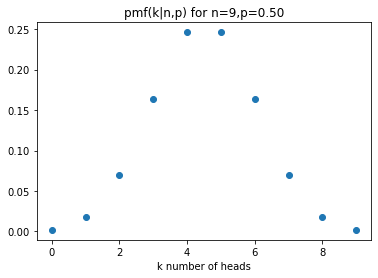

In [8]:
#Low efficiency 
def binomial_pmf(n,k,p):
    return (math.factorial(n)/(math.factorial(k)*math.factorial(n-k))) * p**k * (1-p)**(n-k)

def total_binomial_pmf(n,p):
    ks = [k for k in range(n+1)]
    return (ks, [binomial_pmf(n,k,p) for k in ks])
n = 9
p = 0.5
ks, values = total_binomial_pmf(n,p)
plt.title('pmf(k|n,p) for' + format(' n=%d,p=%.2f'%(n,p)))
plt.xlabel('k number of heads')
plt.scatter(ks, values)

print ('pmf normalization = ' +format('%f'%float(sum(values))))

### b).

The likelihood function in this case can be interpreted as the pdf (for discrete data pmf) of successes conditioned on the number of tosses and the probability of obtaining heads in a single toss.

(2) $$L(p)=\text{pmf}(k|n,p)$$

likelihood normalization can be different than one 1 = 0.100004


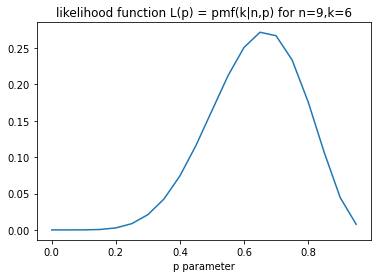

In [78]:
def total_binomial_likelihood1(n,k):
    ps= list(np.arange(0,1.0,0.05))
    return (ps, [binomial_pmf(n,k,p) for p in ps])

n = 9
k = 6
ps,values2 = total_binomial_likelihood1(n,k)
plt.title('likelihood function L(p) = pmf(k|n,p) for' + format(' n=%d,k=%d'%(n,k)))
plt.xlabel('p parameter')
plt.plot(ps,values2)

print ('likelihood normalization can be different than one 1 = ' +format('%f'%float(sum(values2)*0.05)))

### c).
The maxium value estimator p_MLE.

In [38]:
print("The likelihood function has maximum for p=p_MLE=argmax[L(p)] = {:.2f}.".format(ps[np.argmax(values2)]))
print("Which is pretty close to what we would obtain analitically (p_MLE = k/n = 6\9 ~ {:.2f}.".format(2/3))

The likelihood function has maximum for p=p_MLE=argmax[L(p)] = 0.65.
Which is pretty close to what we would obtain analitically (p_MLE = k/n = 6\9 ~ 0.67.


### Problem 38
When MAP and MLE give the same results?

In lecture 6 slide 18 it was stated that:

(3) $$\Theta_{MAP}=\text{argmax}(f(\theta|x))=\text{argmax}(f(x|\theta)\cdot f(\theta)).$$

(4) $$\Theta_{MLE}=\text{argmax}(f(x|\theta)).$$

Consequently, $\Theta_{MAP}=\Theta_{MLE}$ when $f(\theta)=1$.

### Problem 39
We want to check if the coin is fair, we estimate the frequency of heads. Calculate the MAP maximum value estimator, when the prior distribution is described by the beta function

(5) $$\text{pdf}(p|\alpha, \beta) = (\alpha-1)! \cdot \frac{( \beta-1)!}{(\alpha+ \beta -1)!} \cdot p^{\alpha-1} \cdot (1-p)^{\beta-1}$$

In order to find the MAP maximum value estimator we need to calculate the posterior distribution. Once we have it we need to find its  mode.

First let us construct an unfair coin tosses generator:

In [31]:
def tossCoins(num,p):
    return np.random.choice(['H','T'],p=[p,1-p], size=num)
def getHeads(li):
    return float(len([x for x in li if x=='H']))
def getSeries(p, samples):
    return [getHeads(tossCoins(s,p))/float(s) for s in samples]

true_p=2/3

n=9
coins = tossCoins(n,true_p)
k = getHeads(coins)

print("n=",n)
print("k=",k)
print("coins=",coins)

n= 9
k= 6.0
coins= ['H' 'H' 'H' 'T' 'H' 'T' 'T' 'H' 'H']


pdf normalization of p = 1.00


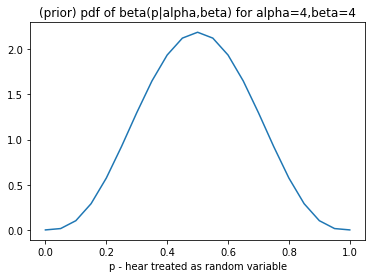

In [22]:
def beta_pdf(p,alpha,beta):
    norm = (math.factorial(alpha-1)*math.factorial(beta-1)/math.factorial(alpha + beta -1))
    return  p**(alpha-1) * (1-p)**(beta-1)/norm

def total_beta_pdf(alpha,beta):
    ps= list(np.arange(0,1.01,0.05))
    return (ps, [beta_pdf(p,alpha,beta) for p in ps])

alpha = 4
beta = 4

ps,prior_values = total_beta_pdf(alpha,beta)
plt.title('(prior) pdf of beta(p|alpha,beta) for' + format(' alpha=%d,beta=%d'%(alpha,beta)))
plt.xlabel('p - hear treated as random variable')
plt.plot(ps,prior_values)


print ('pdf normalization of p = ' +format('%.2f'%float(sum(prior_values)* 0.05)))

The Bayes theorem gives:

(6) $$\text{posterior distribution} \sim \text{observation (likelihood)}  \cdot  \text{prior distribution}.$$

The prior distribution is given by (5) and the likelihood can be calculated the same way as in problem 35 b.


(7) $$L(p)=\text{pmf}(k|n,p)$$

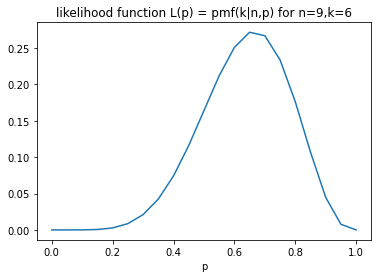

In [23]:
def total_binomial_likelihood(n,k):
    ps= list(np.arange(0,1.01,0.05))
    return (ps, [binomial_pmf(n,k,p) for p in ps])

def binomial_pmf(n,k,p):
    return (math.factorial(n)/(math.factorial(k)*math.factorial(n-k))) * p**k * (1-p)**(n-k)

n=9  #I assume that in this pseudo-experiment there were 9 tosses and 6 sucesses!
k=6
ps,observation_values = total_binomial_likelihood(n,k)
plt.title('likelihood function L(p) = pmf(k|n,p) for' + format(' n=%d,k=%d'%(n,k)))
plt.xlabel('p')
plt.plot(ps,observation_values)
plt.show()

Consequently, 

 (8) $$\text{posterior distribution}=\text{pdf}(p|\alpha+k, \beta+(n-k)) \sim \text{pmf}(k|n, p) \cdot \text{pdf}(p|\alpha, \beta)$$ 

This gives us a possibility to update our prior distribution with every measurement. The posterior distribution becomes our prior for the next observation.

# THE KEY POINT OF THE PROBLEM !

In the light of the above p_MAP that maximises the posterior distribution is given by:

(9) $$\text{p_MAP} = \text{argmax pdf}(p|\alpha+k,\beta+(n-k)) = \text{mode}(\text{pdf}(p|\alpha + k,\beta + n-k)) =\frac{(\alpha+k-1)}{(\alpha + \beta +n-2)}.$$ 

We can obtain (9) by solving:

(10) $$\frac{\partial}{\partial p}\text{pdf}(p|\alpha+k,\beta+(n-k))=0,$$

which is equivallent to solving:

(11) $$\frac{\partial}{\partial p} p^{\alpha+k-1}(1-p)^{\beta+n-k-1}=0.$$

After calculating the derivative we get:

(12) $$(\alpha+k-1)p^{\alpha+k-2}(1-p)^{\beta+n-k-1}+(\beta+n-k-1)p^{\alpha+k-1}(1-p)^{\beta+n-2}=0.$$

Which can be written as:

(13) $$p^{\alpha+k-2}(1-p)^{\beta+n-k-2}\left[(\alpha+k-1)-p(\alpha+\beta+n-2)\right]=0$$

A good mathematician would immediately see that  (13) leads directly to (9).

# $\text{pdf}(p|\alpha+k, \beta+(n-k))$

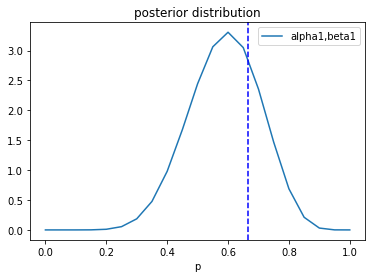

In [24]:
alpha = alpha + k
beta = beta + (n-k)
ps,posterior_values = total_beta_pdf(alpha,beta)
plt.title('posterior distribution')
plt.xlabel('p')
plt.plot(ps,posterior_values, label = 'alpha1,beta1')
plt.axvline(x= true_p, color='blue', linestyle='--')
plt.legend()
plt.show()

We can see the mode p_MAP is close to the value obtained using (9) which is $0.6$.

Which is consistent with:

# $\text{pmf}(k|n, p) \cdot \text{pdf}(p|\alpha, \beta)$

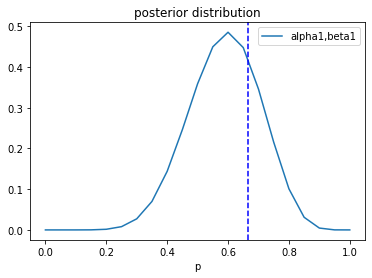

In [25]:
posterior_multiplication = np.multiply(prior_values,observation_values)

plt.title('posterior distribution')
plt.xlabel('p')
plt.plot(ps,posterior_multiplication, label = 'alpha1,beta1')
plt.axvline(x= true_p, color='blue', linestyle='--')
plt.legend()
plt.show()

As you can see both $\text{pmf}(k|n, p) \cdot \text{pdf}(p|\alpha, \beta)$ and $\text{pdf}(p|\alpha+k, \beta+(n-k))$
yield similar results!

The course instructor suggested here to perform many pseudo-experiments: https://github.com/wkrzemien/dataScienceAndML2020/blob/master/notebooks/mle_map/toss_coins_MLE_MAP_example.ipynb.

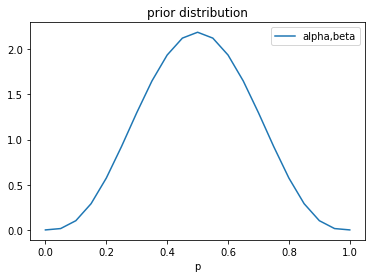

['H' 'H' 'H' 'H' 'T' 'H' 'H' 'T' 'T']


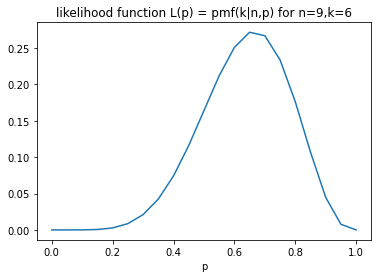

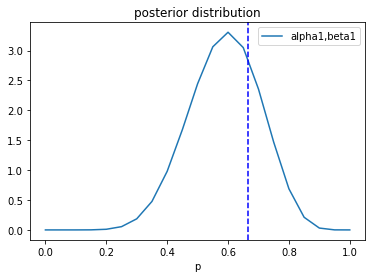

['H' 'H' 'T' 'T' 'H' 'H' 'H' 'H' 'H']


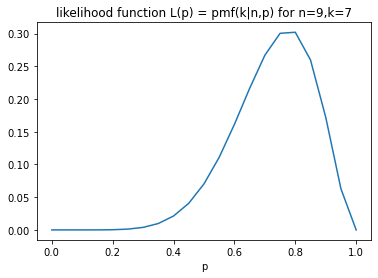

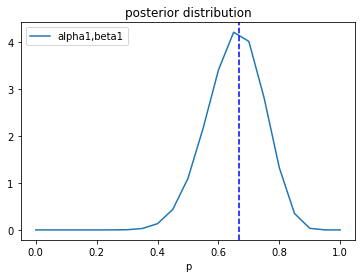

['H' 'H' 'T' 'H' 'H' 'H' 'T' 'T' 'T']


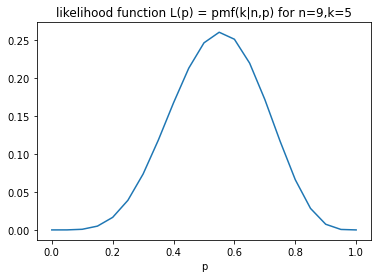

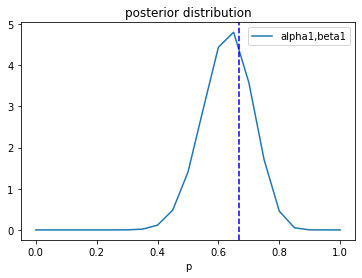

['H' 'H' 'H' 'H' 'T' 'T' 'T' 'H' 'H']


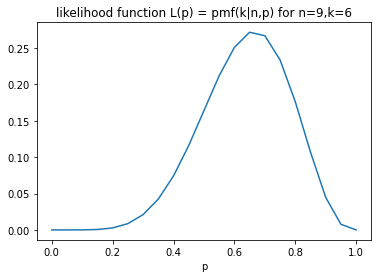

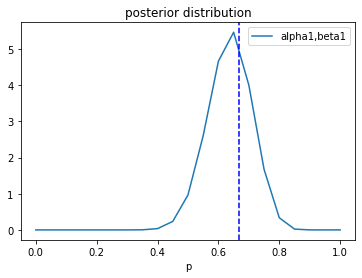

In [32]:
# Show step by step for 2 cases
alpha = 4.
beta = 4.
ps,prior_values = total_beta_pdf(alpha,beta)
plt.title('prior distribution')
plt.xlabel('p')
plt.plot(ps,prior_values, label = 'alpha,beta')
plt.legend()
plt.show()

for _ in range(4):
    coins = tossCoins(n,true_p)
    k = getHeads(coins)
    print (coins)

    ps,observation_values = total_binomial_likelihood(n,k)
    plt.title('likelihood function L(p) = pmf(k|n,p) for' + format(' n=%d,k=%d'%(n,k)))
    plt.xlabel('p')
    plt.plot(ps,observation_values)
    plt.show()

    alpha = alpha + k
    beta = beta + (n-k)
    ps,posterior_values = total_beta_pdf(alpha,beta)
    plt.title('posterior distribution')
    plt.xlabel('p')
    plt.plot(ps,posterior_values, label = 'alpha1,beta1')
    plt.axvline(x= true_p, color='blue', linestyle='--')
    plt.legend()
    plt.show()


### Problem 40
Consider the case of $\lambda >> 1$, and $\lambda \approx 0$: how does it affect the overfitting/bias problem? Will the procedure work correctly anyway?

$$ E_T[L(f_\theta(x),Y)]=\frac{1}{2N} \sum (\theta^T x^{(i)}-y^{(i)})^2 + \frac{\lambda}{2}\sum \theta_j^2 $$

For $\lambda \approx 0$ the procedure effectively works like ordinary least squares method without regularisation. We have low bias high variance. 

For $\lambda \rightarrow 1$ the fit error goes to infinity and $\theta_{j}\rightarrow 0$. We have very high bias and extremly low variance.

### Problem 41
Read the code and try to understand how it works. By changing the values of degree and alpha observe the interplay of overfitting/bias
* for which values one can obtained the reasonable fit to data ?
* plot the training and test errors as a function of polynomial degree (for fixed alpha)
* plot the training and test errors as a function of regularization term (for fixed degree). 

In [108]:
#helper function
def sortXAndY(x,y):
    perm = x.argsort()
    return x[perm],y[perm]

In [109]:
#For the purpose of this exercices we consider the simple noisy sine function.
def true_f(x):
    return np.sin(2*np.pi*x)

def sampleWithNoise(nSamples = 100, noiseFraction = 0.3, f = true_f):
    x = np.sort(np.random.rand(nSamples))
    return x, f(x) + noiseFraction* np.random.normal(0,1,len(x))

In [111]:
# Number of samples.
samples = 100
# Fraction which determines how noisy is or sampled model.
frac =0.3
# Polynomial degree used to fit the model.
polynomialDegree = 1
# If true the penalty term in the cost function will be used
withRegularization = False
# The regularization parameter, which determines the strength of the penalty term.
alpha = 100
# In what ratio our sample will be divided into the training and test sets
# e.g. 0.8 means 80% of sampels for training and 20% for evaluation.
trainTestSplit = 0.8

if not withRegularization:
    alpha = 0

In [112]:
# Get our samples from the model. For the model details please check.
# model.py.
x, y = sampleWithNoise(nSamples = samples, noiseFraction = frac)

# We split our samples into training and tests sets, the samples are chosen randomly.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size = trainTestSplit)

# We sort our divided sets to arrange them in ascending order with respect to x.
xTrain,yTrain  = sortXAndY(xTrain,yTrain)
xTest,yTest  = sortXAndY(xTest,yTest)

# To use linear regression with the polynomial fit, we add polynomial features from
# our original ones.x1=x --> x1=x, x2=x^2, etc.  e.g. [[2]] - > [[2], [4]]
# Please note that also mixed terms will be used. For more details see:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
poly = PolynomialFeatures(degree=polynomialDegree, include_bias =False)
# The reshape(-1,1) is a technical trick necessary only in case if we have only one feature per sample.
xTrainPolynomial = poly.fit_transform(xTrain.reshape(-1, 1))
xTestPolynomial = poly.fit_transform(xTest.reshape(-1, 1))

reg = None
if withRegularization:
# Ridge model is just linear regression + regularization term.
    reg = linear_model.Ridge (alpha = alpha)
else:
    reg = linear_model.LinearRegression()

# We train our model.
reg.fit(xTrainPolynomial,yTrain)
# We predict values from the training and test sets, based on our trained model.
yPredictTrain= reg.predict(xTrainPolynomial)
yPredictTest=reg.predict(xTestPolynomial)

# We calculate the train and test errors.
mseTrain = mean_squared_error(yTrain, yPredictTrain)
mseTest = mean_squared_error(yTest, yPredictTest)

print("Training error:" + str(mseTrain))
print("Test error:" + str(mseTest))

Training error:0.27020177926552913
Test error:0.24369631617182047


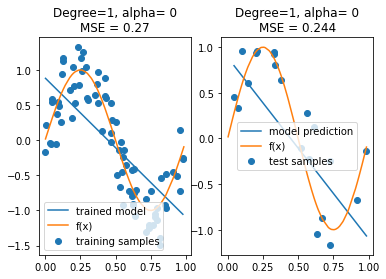

In [113]:
#******Plotting part******
plt.figure(1)
plt.subplot(121)

plt.title("Degree={}, alpha= {}\nMSE = {:.3}".format(
polynomialDegree , alpha, mseTrain))
plt.scatter(xTrain, yTrain, label = "training samples")
plt.plot(xTrain, yPredictTrain, label='trained model')
plt.plot(x, true_f(x), label="f(x)")
plt.legend(loc="best")

plt.subplot(122)
plt.title("Degree={}, alpha= {}\nMSE = {:.3}".format(
polynomialDegree , alpha, mseTest))
plt.scatter(xTest, yTest, label = "test samples")
plt.plot(xTest, yPredictTest, label='model prediction')
plt.plot(x, true_f(x), label="f(x)")
plt.legend(loc="best")
plt.show()

### Problem 42
We consider a linear regression model. Let’s assume that the error model is additive $y= f(x) + \epsilon$ , and errors are have Gaussian distribution with 0 mean ($E[\epsilon] =0$) and variance
($\text{Var}[\epsilon] =\sigma^2$). We In addition, assume that our parameters are described by:

a). Gaussian Distribution, with 0 mean, and some variance

b). Laplace Distribution, with 0 mean, and some variance

Derive the minimization problem starting from the MAP approach, taking into account the prior distribution of the parameters.

$$\Theta_{MAP}=\text{argmax}\left[log\left(P(y|\theta)\right)+log\left(P(\theta)\right)\right].$$

For ordinary linear regression:
    
(1) $$log\left[P(y|\theta)\right]=log\left(\prod_{i}^{n}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y-(\theta_{1}x_{i}+\theta_{0}))^{2}}{2\sigma^{2}}}\right)$$

For gaussian prior:

(2) $$log\left[P(\theta)\right]=log\left(\frac{1}{\tau\sqrt{2\pi}}e^{-\frac{(\theta_{0}^{2}+\theta_{1}^{2})}{2\tau^{2}}}\right).$$

For laplacian prior:

(3) $$log\left[P(\theta)\right]=log\left(\frac{1}{2b}e^{-\frac{(|\theta_{0}|+|\theta_{1}|)}{2b}}\right)$$

#### a).

$$\Theta_{MAP}=\text{argmax}((1)+(2))=\text{argmax}\left[log\left(\prod_{i}^{n}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y-(\theta_{1}x_{i}+\theta_{0}))^{2}}{2\sigma^{2}}}\right)+log\left(\frac{1}{\tau\sqrt{2\pi}}e^{-\frac{(\theta_{0}^{2}+\theta_{1}^{2})}{2\tau^{2}}}\right)\right]=$$

$$=\text{argmax}\left[-\sum_{i=1}^{n}\frac{y_{i}-(\theta_{1}x+\theta_{0})}{2\sigma^{2}}-\left(\frac{\theta_{1}^{2}+\theta_{0}^{2}}{2\tau^{2}}\right)\right]=$$

$$=\text{argmin}\left[\frac{1}{2\sigma^{2}}\left(\sum_{i=1}^{n}(y_{i}-(\theta_{1}x+\theta_{0}))\right)+\frac{\sigma^{2}}{\tau^{2}}\left(\theta_{1}^{2}+\theta_{0}^{2}\right)\right]=$$

$$=\text{argmin}\left[\sum_{i=1}^{n}\left(y_{i}-(\theta_{1}x+\theta_{0})\right)^{2}+\lambda(\theta_{1}^{2}+\theta_{0}^{2})\right].$$

#### b).

$$\Theta_{MAP}=\text{argmax}((1)+(3))=\text{argmax}\left[log\left(\prod_{i}^{n}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y-(\theta_{1}x_{i}+\theta_{0}))^{2}}{2\sigma^{2}}}\right)+log\left(\frac{1}{2b}e^{-\frac{|\theta_{0}|+|\theta_{1}|}{2b}}\right)\right]=$$

$$=\text{argmax}\left[-\sum_{i=1}^{n}\frac{y_{i}-(\theta_{1}x+\theta_{0})}{2\sigma^{2}}-\left(\frac{|\theta_{1}|+|\theta_{0}|}{2b}\right)\right]=$$

$$=\text{argmin}\left[\frac{1}{2\sigma^{2}}\left(\sum_{i=1}^{n}(y_{i}-(\theta_{1}x+\theta_{0}))\right)+\frac{\sigma^{2}}{b}\left(|\theta_{1}|+|\theta_{0}|\right)\right]=$$

$$=\text{argmin}\left[\sum_{i=1}^{n}\left(y_{i}-(\theta_{1}x+\theta_{0})\right)^{2}+\lambda(|\theta_{1}|+|\theta_{0}|)\right].$$

### Problem  43 
We consider a classification model with some regularization scheme. Which statements
are true? Justify your choice.
* Adding regularization would typically lower the training error
 
FALSE 

The whole concept of regularisation is to make the error function more sensitive. We effectively add an extra assumption about data which results in the introduction of an addition positive term, which acts as a punishment for increased complexity.

* Adding new features to your model would make the training error higher or the same

FLASE/TRUE

It depends. The number of features should be "just right". We want to land in a sweet spot of the bias-variance trade-off.

* Adding regularisation would typically lower the test error

TRUE

Yes! Adding regularisation increases the generalisation power of our algorithm.

* Adding regularisation can cause overfitting of your model

FALSE

Adding reguralisation decreases complexity and thus in a sense counteracts overfitting.

* Using a large value of the lambda parameter can cause the overfitting of your model

FALSE

Quite the opposite. We reduce complexity and variance at the expense of growing bias.


* Adding regularisation can introduce bias to your model

TRUE

As we increase lambda the importance of the punishment term is growing. At some point it starts to dominate pushing the fit parameter values to 0. As a result, we end up with extremly high bias.

* Adding regularisation can make the training error higher


TRUE

For $\lambda \rightarrow \infty$ the training error goes to ininity as well.

### Problem 44
Calculate the derivative of the sigmoid function and express it using the sigmoid.


(44) $$\frac{d}{d x}S(x)=\frac{d}{d x}\left(\frac{1}{1+e^{-x}}\right)=\frac{e^{-x}}{(1+e^{-x})^{2}}=\frac{1}{1+e^{-x}}\frac{e^{-x}}{1+e^{-x}}.$$

The first factorial in (44) is S(x) therefore:
    
(45)$$\frac{d}{d x}S(x)=S(x)\frac{-1+1+e^{-x}}{1+e^{-x}}=S(x)(1-S(x)).$$

### Problem 45 
Assuming the loss function definition as:
                  
$$L(f_\theta(x),Y) = \left\{
     \begin{array}{lr}
      -log f_\theta(x) & :  Y=1\\
      -log (1-f_\theta(x)) & :  Y=0\\
      \end{array}
   \right.  $$               
                   
what are the loss values for:
* $f_\theta(x)=0$, Y=0
* $f_\theta(x)=1$, Y=0
* $f_\theta(x)=0$, Y=1
* $f_\theta(x)=1$, Y=1

Draw L as a function of $f_\theta(x)$ for Y= 0 and Y=1.

$$L(0,0)=-log(1-0)=0$$

$$L(1,0)=-log(1-1)=+\infty$$

$$L(0,1)=-log(0)=+\infty$$

$$L(1,1)=-log(1)=0$$

In [86]:
def Loss(y):
    fs= list(np.arange(0.001,1,0.01))
    return (fs, [-y*np.log(f)-(1-y)*np.log(1-f) for f in fs])

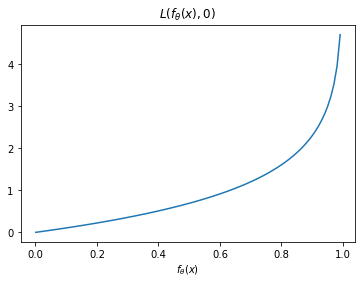

In [87]:
y=0 #Y=0
fs, L0 = Loss(y)
plt.title(r'$L(f_{\theta}(x),0)$')
plt.xlabel(r'$f_{\theta}(x)$')
plt.plot(fs,L0)
plt.show()

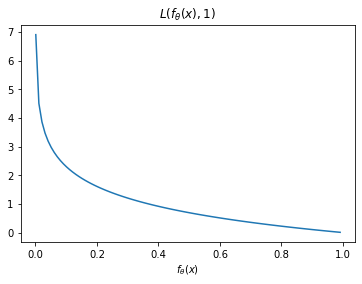

In [88]:
y=1 #Y=1
fs, L0 = Loss(y)
plt.title(r'$L(f_{\theta}(x),1)$')
plt.xlabel(r'$f_{\theta}(x)$')
plt.plot(fs,L0)
plt.show()

The conclusion from this task is that if $f_{\theta}(x)$ is the sigmoid function, which has the codomain (0,1), then the set of $f_{\theta}(x)$ is mapped into $(0,\infty).$

### Problem 46
Calculate the equation of the decision boundary for the logistic regression model assuming:

$$ f_\theta(x)\geq 0.5 \to Y=1\\
f_\theta(x)< 0.5 \to Y=0$$

For logistic regression we have:
    
(46) $$f_{\theta}(x)=\frac{1}{1+e^{-\text{decision_boundary(x)}}}=\frac{1}{1+e^{-(\theta_{1}x+\theta_{0})}}.$$

(disclaimer! in general $\text{decision_boundary}(x)\neq \theta_{0}x+\theta_{1}$ but I took some creative liberty here).

Now let us write the condition for decision boundary:
    
(47) $$f_{\theta}(x)=\frac{1}{1+e^{-\text{decision_boundary(x)}}}=\text{threshold}.$$   

Having obtained (47) we can solve (47) for the decision_boundary(x):
    
(48) $$\text{decision_boundary}(x)=\theta_{1}x+\theta_{0}=\text{log}\left(\frac{\text{threshold}}{1-\text{threshold}}\right).$$

Naturally, for $\text{threshold}=\frac{1}{2}$ we end up with:
    
(49) $$\text{decision_boundary}(x)=\theta_{1}x+\theta_{0}=0.$$

### Problem 47
* For which value of K K-fold cross-validation is equivalent to Leave-one-out method?
* Order the cross-validation methods (K-fold e.g. K=5, leave-one-out and the simple splitting into validation and training sets) in the ascending cost of the computation power
* For which K the K-fold cross-validation requires the most of the computing power?

Justify your answers

In [ ]:
:(

### Problem 48
We consider two cases of binary classifier tests:
* A - airplanes security checks before the take-off (Y=’allowed’/’denied’)
* B - decision if according to her/his profile a client will be potentially interested to buy a new product and if to show her/him the targeted advertisement(Y=’yes’/’no’)

How would we decide how to tune our classifier threshold for each case in the context of sensitivity vs specificity trade-off? Justify your answer.

In [ ]:
:(